In [2]:
import numpy as np
import matplotlib.pyplot as plt
from climada_petals.hazard.river_flood import RiverFlood
from climada.hazard.centroids import Centroids
from climada_petals.util.constants import HAZ_DEMO_FLDDPH, HAZ_DEMO_FLDFRC

years = [2000]

/Users/arnaudgoussebaile/miniconda3/envs/climada_env/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 8.0.0. Please consider upgrading.
  warnings.warn(


# Generating a RiverFlood Hazard

### Setting floods for countries with Natural Earth Multipolygons:

In [3]:
# generating RiverFlood hazard from netCDF file
# uses centroids from Natural Earth Multipolygon for Germany and Switzerland
rf = RiverFlood.from_nc(countries = ['DEU','CHE'], years=years, dph_path=HAZ_DEMO_FLDDPH, frc_path=HAZ_DEMO_FLDFRC)
rf.event_name 

['2000']

In [4]:
type(rf)

climada_petals.hazard.river_flood.RiverFlood

resolution: 0.04166666666666662


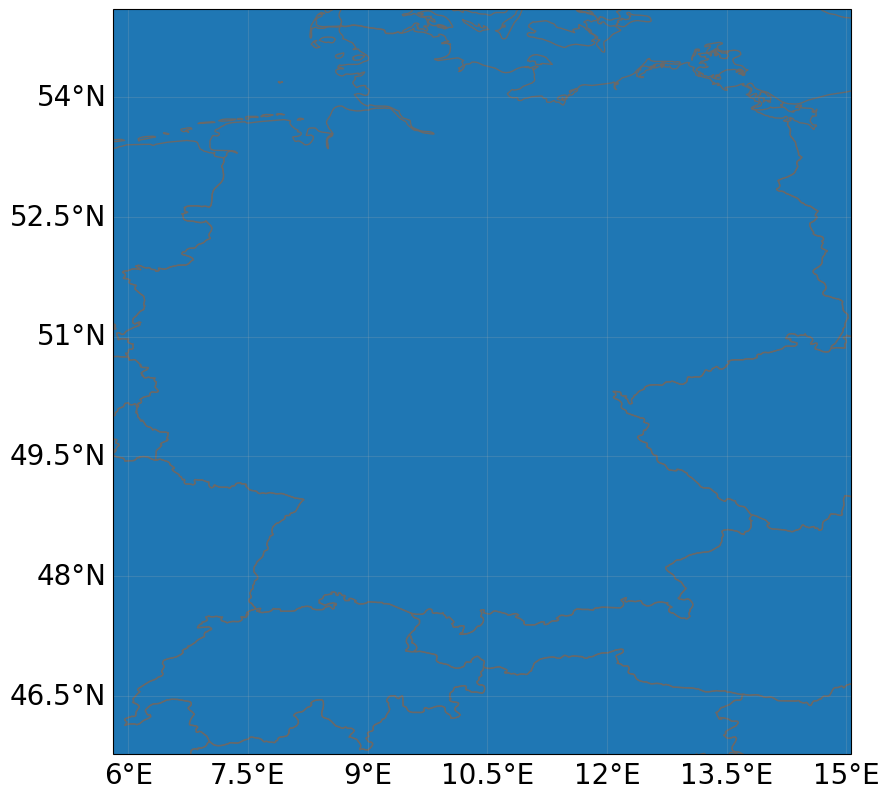

In [ ]:
# Note: Points outside the selected countries are masked in further analysis.
# plot centroids:
rf.centroids.plot()
# get resolution
print('resolution:', rf.centroids.meta['transform'][0])

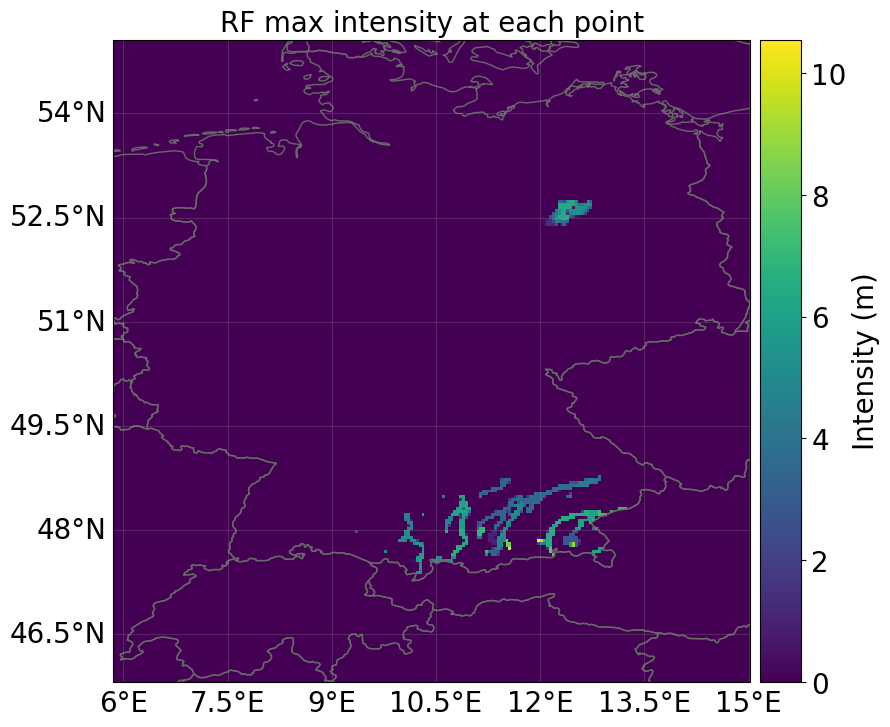

In [ ]:
# plotting intensity (Flood depth in m)
rf.plot_intensity(event=0, smooth = False);

### Setting flood with ISIMIP NatIDGrid:

/Users/arnaudgoussebaile/miniconda3/envs/climada_env/lib/python3.9/site-packages/climada/util/coordinates.py:893: RuntimeWarning: invalid value encountered in cast
  region_id = hdf5_f['NatIdGrid'].reshape(grid_shape).astype(int)


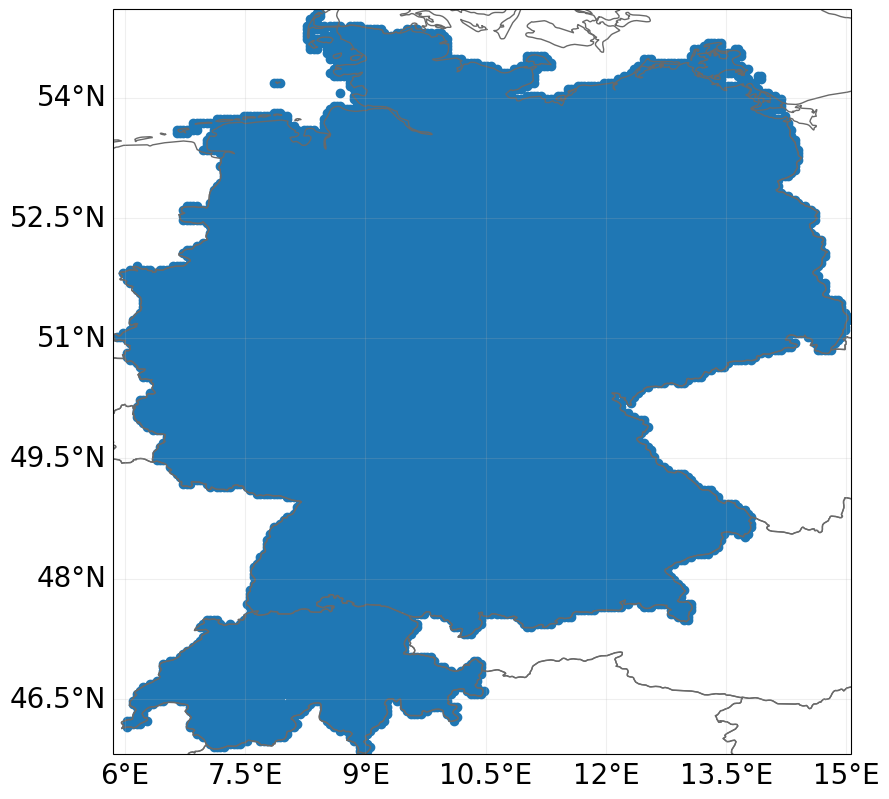

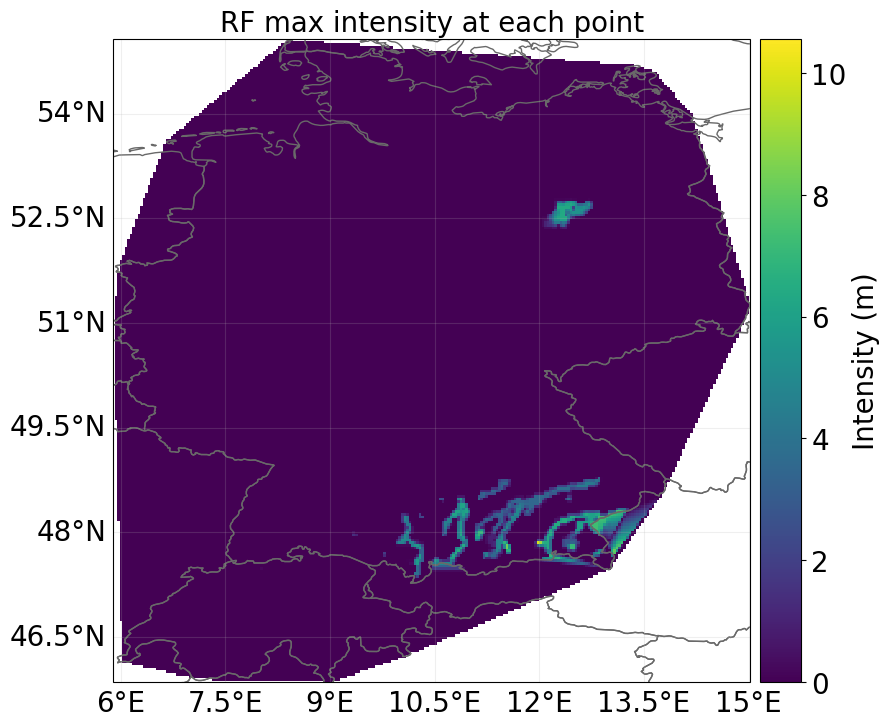

In [9]:
# generating RiverFlood hazard from netCDF file, using the ISIMIP NatIDGrid (according to ISIMIP standards) with a resolution of 150as (aprox 5km)
# setting centroids for a region
rf_isi = RiverFlood.from_nc(countries = ['DEU','CHE'], years=years, dph_path=HAZ_DEMO_FLDDPH, frc_path=HAZ_DEMO_FLDFRC, ISINatIDGrid=True)
rf_isi.centroids.plot()
rf_isi.plot_intensity(event=0, smooth = False);

### Setting flood with random points as coordinates:

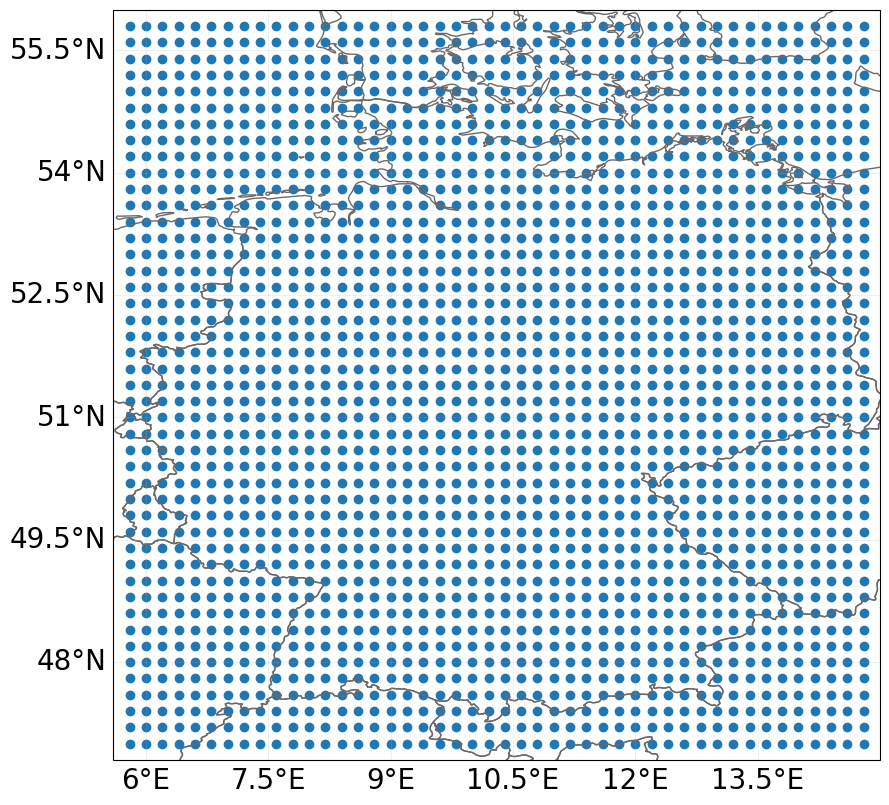

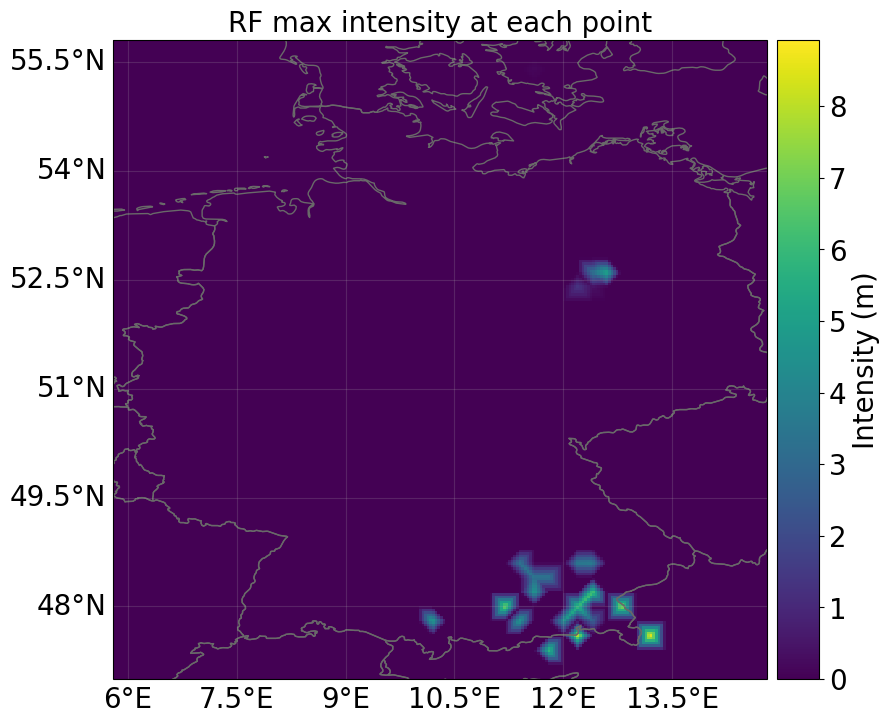

In [11]:
lat = np.arange(47, 56, 0.2)
lon = np.arange(5.8, 15, 0.2)
lon, lat = np.meshgrid(lon, lat)
rand_centroids = Centroids.from_lat_lon(lat.flatten(), lon.flatten())
rf_rand = RiverFlood.from_nc(dph_path=HAZ_DEMO_FLDDPH, frc_path=HAZ_DEMO_FLDFRC,
                    centroids=rand_centroids, ISINatIDGrid=False)
rf_rand.centroids.plot()
rf_rand.plot_intensity(event = 0);

# Calculating Flooded Area

/Users/arnaudgoussebaile/miniconda3/envs/climada_env/lib/python3.9/site-packages/climada/hazard/centroids/centr.py:873: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  xy_pixels = self.geometry.buffer(res / 2).envelope


Total flooded area for year 2000 in Germany:
2437074832.038374 m2
Total flooded area at first event in Germany:
2437074832.038374 m2


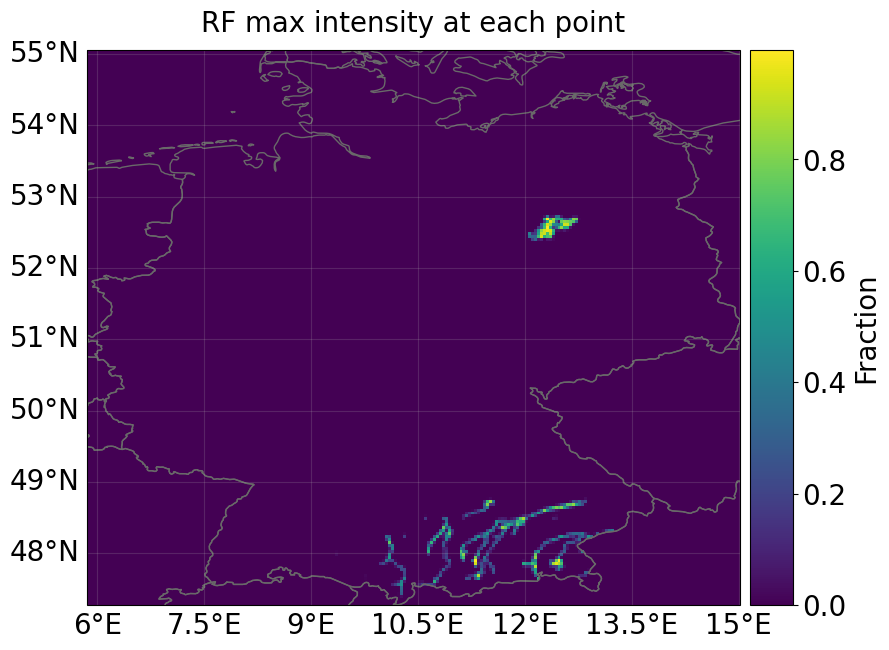

In [12]:
#setting river flood
rf_DEU = RiverFlood.from_nc(countries = ['DEU'], years=years, dph_path=HAZ_DEMO_FLDDPH, frc_path=HAZ_DEMO_FLDFRC)
rf_DEU.plot_fraction(event=0, smooth = False)
# calculating flooded area
rf_DEU.set_flooded_area()
print("Total flooded area for year " + str(years[0]) + " in Germany:")
print(str(rf_DEU.fla_annual[0]) + " m2")

print("Total flooded area at first event in Germany:")
print(str(rf_DEU.fla_event[0]) + " m2");

In [13]:
#calculate flooded area
rf_DEU.set_flooded_area(save_centr = True)
print("affected area in each affected centroid and each event:")
rf_DEU.fla_ev_centr.data

/Users/arnaudgoussebaile/miniconda3/envs/climada_env/lib/python3.9/site-packages/climada/hazard/centroids/centr.py:873: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  xy_pixels = self.geometry.buffer(res / 2).envelope


affected area in each affected centroid and each event:


array([  584715.81718056,  5053615.42987047,   584715.81718053,
         772660.21477222,  4635961.19139062,  4844788.31063079,
         877073.72577079,    62648.12847878,   793542.93642048,
         710012.09844878,   104512.31458989,  7942935.27615602,
       12980428.9975574 ,  8862643.59587924, 11015597.79960522,
        8151960.31900815,  8026545.7605037 ,  8110155.46617279,
        3428003.77254628,  2550100.30565756,  5748176.99827292,
       10743865.08816197, 10116791.51696033,   167219.69117698,
         167377.62651458,  2426975.61490724,  7866748.53143359,
       12448711.57332617, 10691246.31833798,  3807841.25590698,
         795043.7594347 ,  9958969.25866094, 10858623.66475107,
       10586635.08712338,  9938046.70065339,  9414992.10340605,
        4100752.00183631,    20922.20331432,  4020851.5658597 ,
        8628077.07461108, 12271973.68427333, 11036399.71240725,
        6135986.84213667,  5863741.76936025,  5319251.23373377,
        7936993.24829797, 12104437.71477

# Setting JRC damage functions

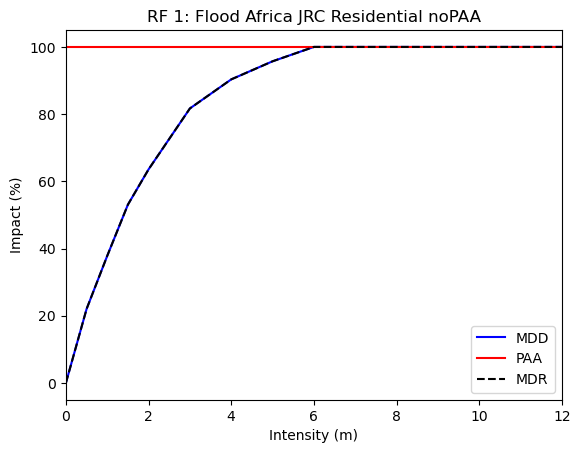

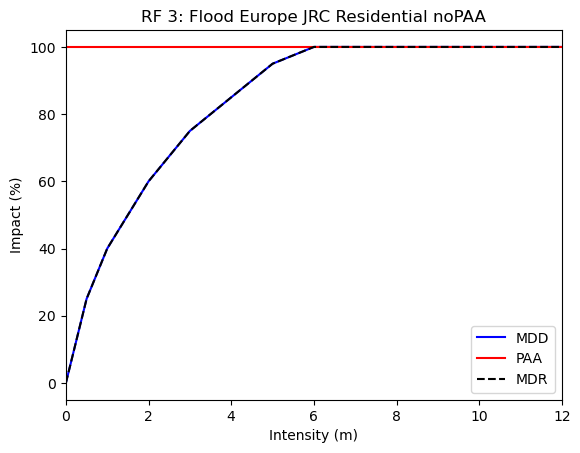

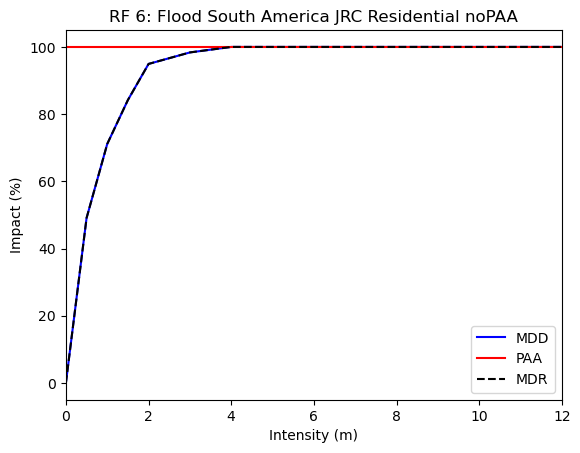

In [16]:
from climada_petals.entity.impact_funcs.river_flood import ImpfRiverFlood,flood_imp_func_set
impf_set = flood_imp_func_set()
impf_AFR = impf_set.get_func(fun_id=1)
impf_AFR[0].plot()
impf_EUR = impf_set.get_func(fun_id=3)
impf_EUR[0].plot()
impf_OCE = impf_set.get_func(fun_id=6)
impf_OCE[0].plot();

# Deriving flood impact with LitPop exposure

In [24]:
from climada.entity import LitPop
lp_exp = LitPop.from_countries(['CHE','DEU'], fin_mode='pc')
lp_exp.gdf

2024-03-08 17:19:03,058 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-03-08 17:19:03,125 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-03-08 17:19:03,193 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-03-08 17:19:03,241 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-03-08 17:19:03,283 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-03-08 17:19:03,345 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-03-08 17:19:03,427 - climada.entity.exposures.litpop.gpw_populati

,value,latitude,longitude,geometry,region_id,impf_
0,190455.407843,47.795833,8.545833,POINT (8.54583 47.79583),756,1
1,217238.144084,47.795833,8.554167,POINT (8.55417 47.79583),756,1
2,182808.053235,47.795833,8.562500,POINT (8.56250 47.79583),756,1
3,129491.458446,47.795833,8.570833,POINT (8.57083 47.79583),756,1
4,58311.978170,47.795833,8.579167,POINT (8.57917 47.79583),756,1
...,...,...,...,...,...,...
731678,250341.475979,54.762500,8.287500,POINT (8.28750 54.76250),276,1
731679,217783.790202,54.762500,8.295833,POINT (8.29583 54.76250),276,1
731680,85829.483882,54.754167,8.279167,POINT (8.27917 54.75417),276,1
731681,249694.815009,54.754167,8.287500,POINT (8.28750 54.75417),276,1


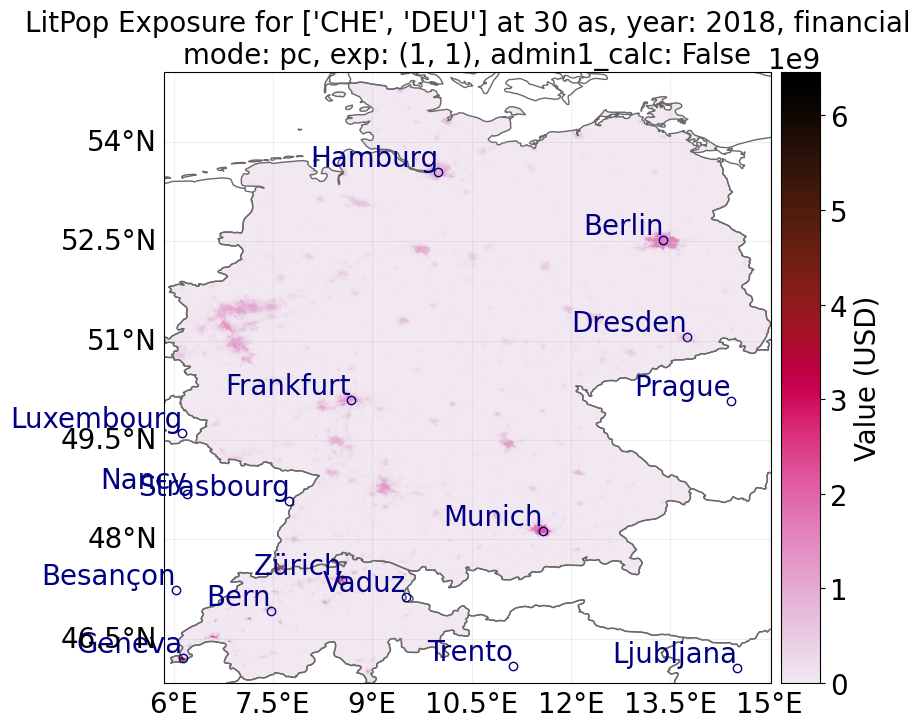

In [28]:
# In the LitPop exposure the damage function for river floods needs
# to be specified manually.
import pandas as pd
from climada_petals.util.constants import RIVER_FLOOD_REGIONS_CSV

info = pd.read_csv(RIVER_FLOOD_REGIONS_CSV)
lp_exp.gdf['impf_RF'] = info.loc[info['ISO']=='DEU','impf_RF'].values[0]
lp_exp
lp_exp.plot_hexbin(pop_name=True);

2024-03-08 17:21:05,319 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.


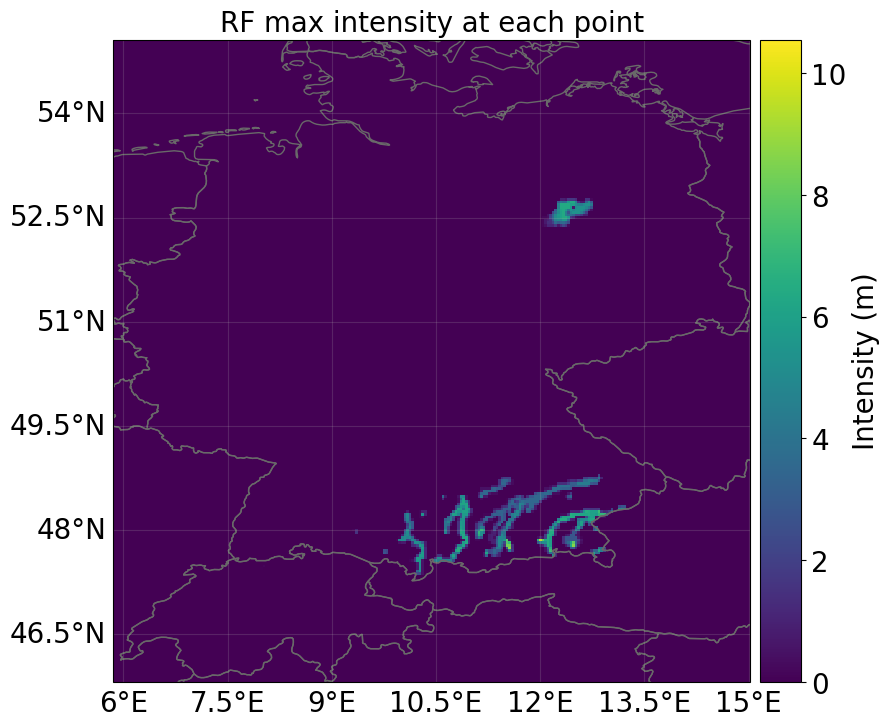

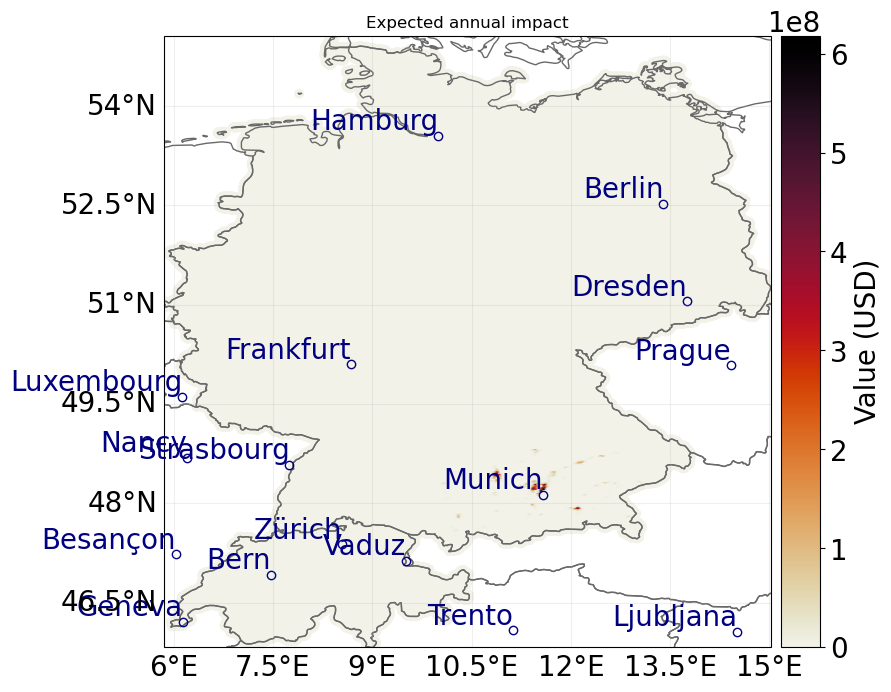

In [27]:
from climada.engine import Impact

rf = RiverFlood.from_nc(countries = ['CHE','DEU'], years=years, dph_path=HAZ_DEMO_FLDDPH, frc_path=HAZ_DEMO_FLDFRC)
imp=Impact()
imp.calc(lp_exp, impf_set,rf,save_mat=True)
rf.plot_intensity(0)
imp.plot_scatter_eai_exposure();